In [1]:
import os
import numpy as np
import matplotlib

In [3]:
rootp = '../multistage/'
name_lst = ['new_interval']
ilst = ['interval0','interval0d','interval0q','interval1','interval1d','interval1q','interval2','interval2d','interval2q']
all_dict = {}
gnv2 = ['interval0gnv2','interval1gnv2','interval2gnv2']
control = ['interval0c','interval1c','interval2c']
for n in name_lst:
    all_dict[n] = {}
    for i in ilst+gnv2+control:
        all_dict[n][i] = {}
        all_dict[n][i]['dir'] = os.path.join(rootp,n,i)
        all_dict[n][i]['data'] = []
for n in name_lst:
    for i in ilst:
        for k in range(1,11):
            temp = np.load(os.path.join(all_dict[n][i]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][i]['data'].append(temp)
        for k in range(15,41,5):
            temp = np.load(os.path.join(all_dict[n][i]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][i]['data'].append(temp)
    for g in gnv2:
        for k in range(1,13):
            temp = np.load(os.path.join(all_dict[n][g]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][g]['data'].append(temp)
    for c in control:
        for k in range(1,10):
            temp = np.load(os.path.join(all_dict[n][c]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][c]['data'].append(temp)
for n in name_lst:
    for i in ilst+gnv2+control:
        all_dict[n][i]['data'] = np.array(all_dict[n][i]['data'])

print(all_dict)


{'new_interval': {'interval0': {'dir': '../multistage/new_interval/interval0', 'data': array([16.288612 ,  9.675479 ,  7.0172534,  5.677233 ,  4.890587 ,
        4.3076706,  3.9749265,  3.7269073,  3.4578109,  3.263686 ,
        2.7639403,  2.7513542,  2.8320336,  2.9806437,  3.1727545,
        3.3323524], dtype=float32)}, 'interval0d': {'dir': '../multistage/new_interval/interval0d', 'data': array([16.41706  ,  8.89144  ,  6.3411984,  5.065056 ,  4.3278837,
        3.9216847,  3.5660226,  3.3679693,  3.1952527,  3.0886536,
        2.6274896,  2.5476449,  2.7617593,  3.047605 ,  3.2946932,
        3.7952883], dtype=float32)}, 'interval0q': {'dir': '../multistage/new_interval/interval0q', 'data': array([22.328394 , 14.478242 , 11.343484 ,  9.589537 ,  8.446225 ,
        7.6396255,  6.9607415,  6.647972 ,  6.2347364,  5.970295 ,
        5.120135 ,  4.7004256,  4.538075 ,  4.363941 ,  4.3222175,
        4.1548815], dtype=float32)}, 'interval1': {'dir': '../multistage/new_interval/interval

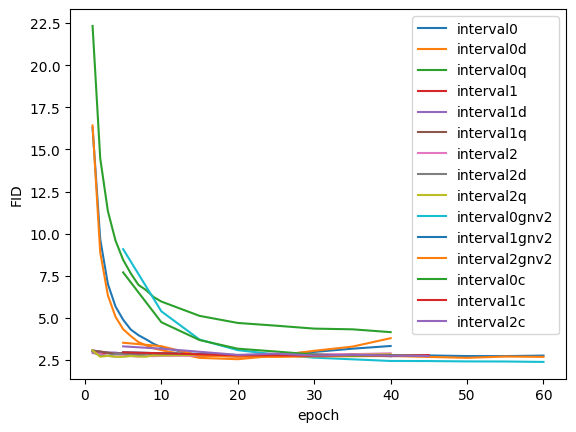

In [5]:
import matplotlib.pyplot as plt

y = list(range(1,11))
y2 = list(range(15,41,5))
y3 = list(range(5,61,5))
y4 = list(range(5,46,5))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
for n in name_lst:
    for i in ilst:
        plt.plot(y+y2,all_dict[n][i]['data'],label=i)
    for g in gnv2:
        plt.plot(y3,all_dict[n][g]['data'],label=g)
    for c in control:
        plt.plot(y4,all_dict[n][c]['data'],label=c)
plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

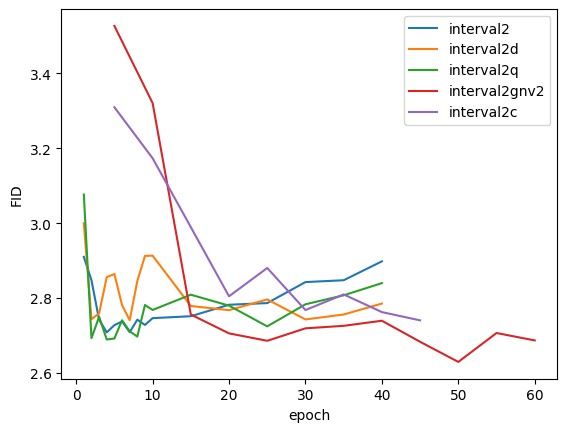

In [9]:
import matplotlib.pyplot as plt

y = list(range(1,11))
y2 = list(range(15,41,5))
interval_num = 2
ilst = ['interval{}'.format(interval_num),'interval{}d'.format(interval_num),'interval{}q'.format(interval_num)]
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
for n in name_lst:
    for i in ilst:
        plt.plot(y+y2,all_dict[n][i]['data'],label=i)
    plt.plot(y3,all_dict[n][gnv2[interval_num]]['data'],label=gnv2[interval_num])
    plt.plot(y4,all_dict[n][control[interval_num]]['data'],label=control[interval_num])   
plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

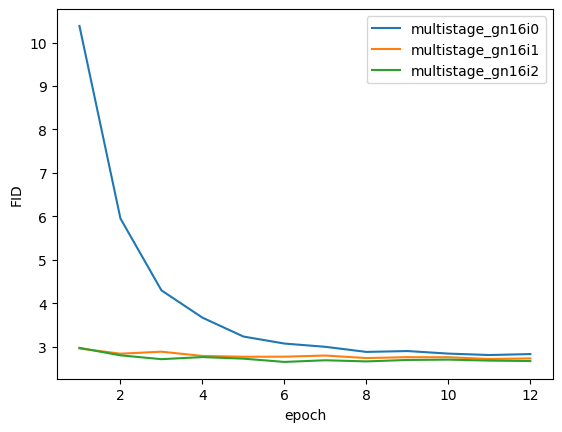

In [13]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = 'multistage_gn16'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

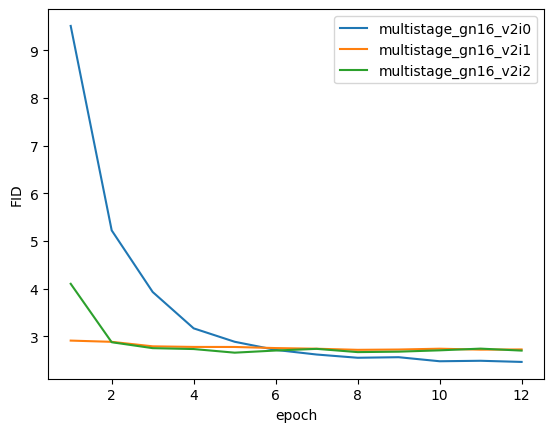

In [14]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = 'multistage_gn16_v2'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

For interval i0,  [8.796884  5.4139557 4.124175  3.5077932 3.2282653 2.9847546 2.90833
 2.8165367 2.7946904 2.7789688]
For interval i1,  [5.1004605 4.1330843 3.7917273 3.5527327 3.5166767 3.408749  3.3522902
 3.2942512 3.20916   3.208165 ]
For interval i2,  [3.0986261 2.9268706 2.8914475 2.768222  2.9042797 2.7679894 2.7672493
 2.77365   2.6794648 2.691006 ]
For interval i3,  [2.7363744 2.7230325 2.7133114 2.6738136 2.6781952 2.6957767 2.6683059
 2.6525362 2.6953216 2.680456 ]


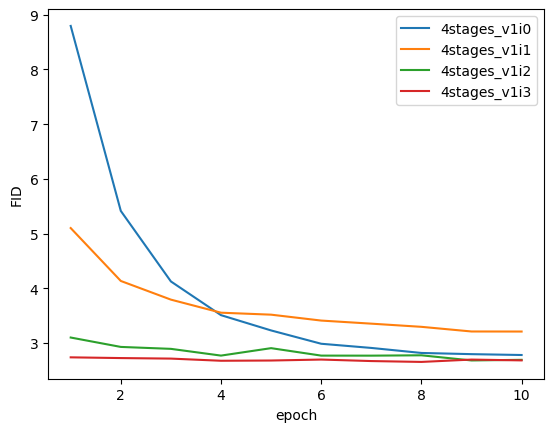

In [6]:
rootp = '/scratch/qingqu_root/qingqu1/shared_data/multistage/'
name_lst = ['4stages_v1']
ilst = ['i0','i1','i2','i3']
all_dict = {}
for n in name_lst:
    all_dict[n] = {}
    for i in ilst:
        all_dict[n][i] = {}
        all_dict[n][i]['dir'] = os.path.join(rootp,n,i)
        all_dict[n][i]['data'] = []
for n in name_lst:
    for i in ilst:
        for k in range(1,11):
            temp = np.load(os.path.join(all_dict[n][i]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][i]['data'].append(temp)
for n in name_lst:
    for i in ilst:
        all_dict[n][i]['data'] = np.array(all_dict[n][i]['data'])

import matplotlib.pyplot as plt

y = list(range(1,11))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = '4stages_v1'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)
    print(f"For interval {i}, ", all_dict[n][i]['data'])

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

For interval i0,  [10.920258   6.404542   4.728709   3.9598327  3.4836857  3.320282
  3.0841935  2.9362125  2.9130046  2.8770869]
For interval i1,  [5.4118614 4.417337  3.9490862 3.794835  3.589025  3.5485883 3.3631127
 3.3223479 3.3468559 3.340235 ]
For interval i2,  [3.0254545 2.955555  2.8927312 2.7850926 2.8153088 2.787801  2.80012
 2.7959836 2.7495008 2.7650452]
For interval i3,  [2.8483531 2.803034  2.8927817 2.789107  2.7708933 2.7870889 2.8308003
 2.814239  2.800026  2.7866127]
For interval i4,  [2.7087393 2.6758134 2.6367075 2.6485364 2.7213564 2.6552703 2.6703925
 2.6528497 2.6551127 2.702642 ]


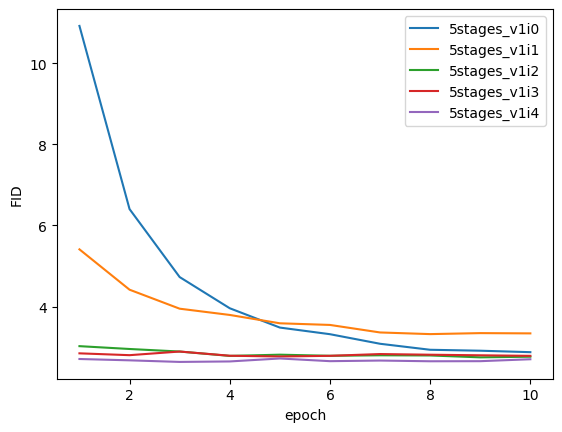

In [12]:
rootp = '/scratch/qingqu_root/qingqu1/shared_data/multistage/'
name_lst = ['5stages_v1']
ilst = ['i0','i1','i2','i3','i4']
all_dict = {}
for n in name_lst:
    all_dict[n] = {}
    for i in ilst:
        all_dict[n][i] = {}
        all_dict[n][i]['dir'] = os.path.join(rootp,n,i)
        all_dict[n][i]['data'] = []
for n in name_lst:
    for i in ilst:
        for k in range(1,11):
            temp = np.load(os.path.join(all_dict[n][i]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][i]['data'].append(temp)
for n in name_lst:
    for i in ilst:
        all_dict[n][i]['data'] = np.array(all_dict[n][i]['data'])

import matplotlib.pyplot as plt

y = list(range(1,11))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = '5stages_v1'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)
    print(f"For interval {i}, ", all_dict[n][i]['data'])

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()